In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

import warnings
import os
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\titanic\train.csv")
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
eda_report = ProfileReport(df)
eda_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

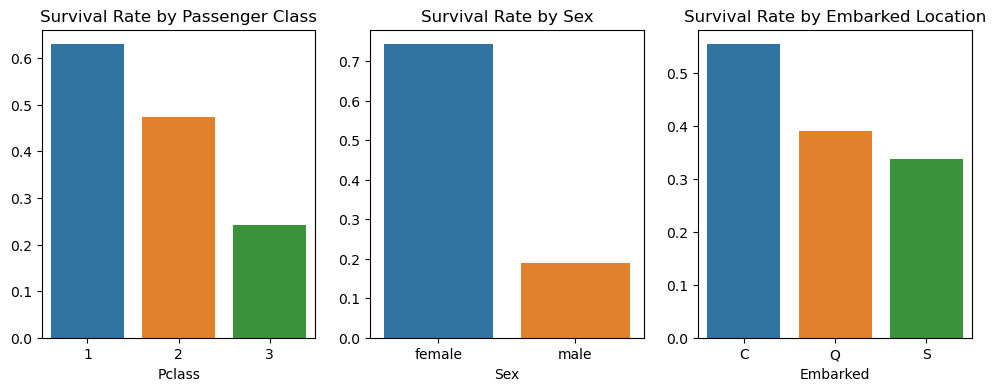

In [5]:
f, axes = plt.subplots(ncols=3,figsize=(12,4))

survival_pclass = df.groupby('Pclass')['Survived'].mean()
sb.barplot(survival_pclass.index, survival_pclass.values, ax = axes[0])
axes[0].set_title('Survival Rate by Passenger Class')

survival_sex = df.groupby('Sex')['Survived'].mean()
sb.barplot(survival_sex.index, survival_sex.values, ax = axes[1])
axes[1].set_title('Survival Rate by Sex')

survival_loc = df.groupby('Embarked')['Survived'].mean()
sb.barplot(survival_loc.index, survival_loc.values, ax = axes[2])
axes[2].set_title('Survival Rate by Embarked Location')

plt.show()

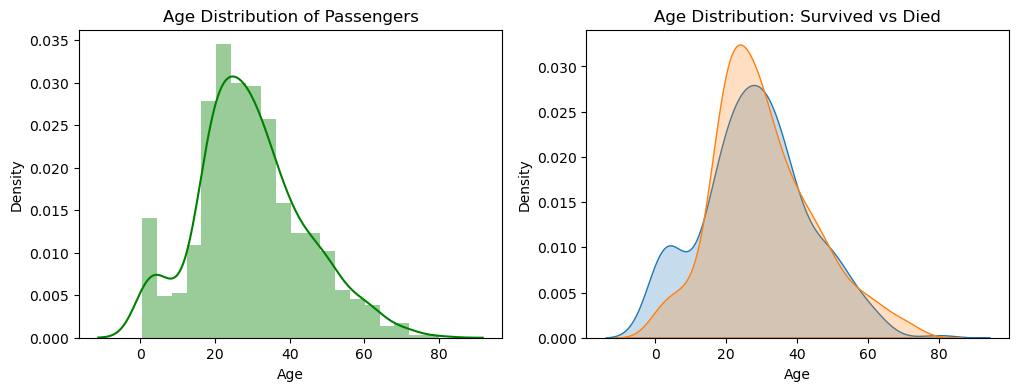

In [6]:
f, axes = plt.subplots(ncols=2, figsize=(12,4))

sb.distplot(df["Age"], color="g", ax=axes[0])
axes[0].set_title("Age Distribution of Passengers")

sb.kdeplot(df["Age"].loc[df["Survived"] == 1], shade= True, ax=axes[1], label='Survived').set_xlabel("Age")
sb.kdeplot(df["Age"].loc[df["Survived"] == 0], shade= True, ax=axes[1], label='Survived').set_xlabel("Age")
axes[1].set_title("Age Distribution: Survived vs Died")

plt.show()

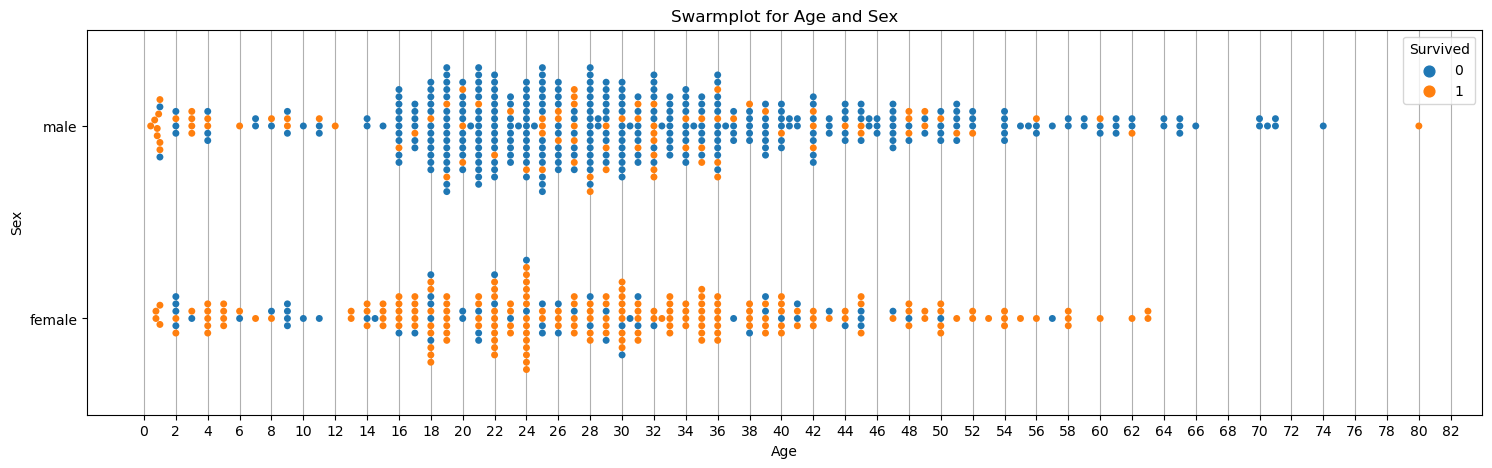

In [7]:
f, ax = plt.subplots(figsize=(18,5))
ax.grid(True)
plt.xticks(list(range(0,100,2)))

sb.swarmplot(x="Age", y="Sex", hue="Survived", data=df).set_title("Swarmplot for Age and Sex")

plt.show()

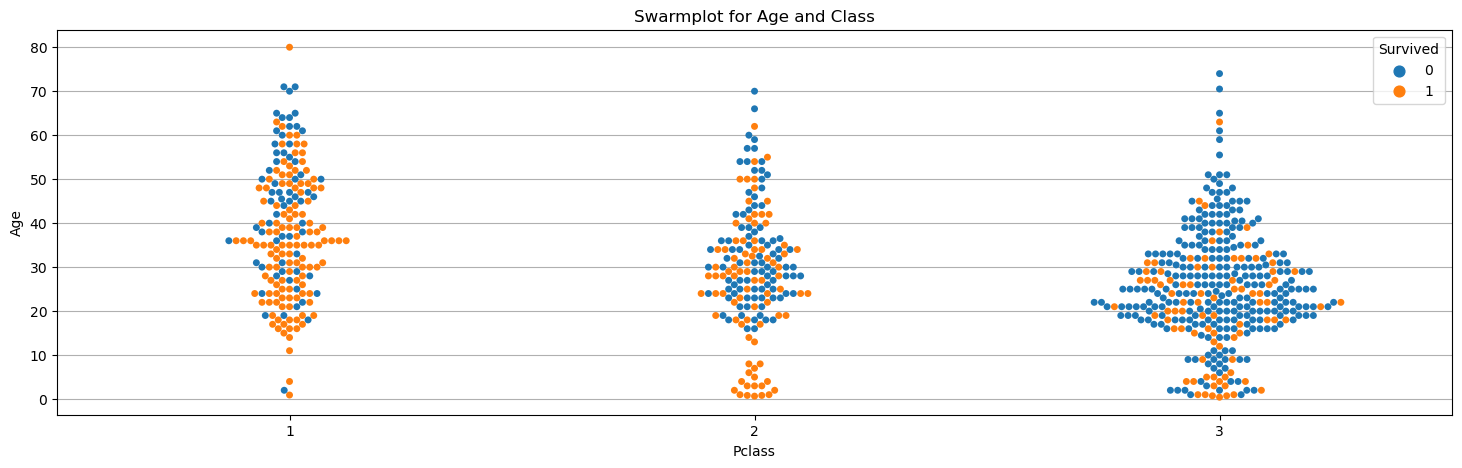

In [8]:
f, ax = plt.subplots(figsize=(18,5))
ax.grid(True)
plt.xticks(list(range(0,100,2)))

sb.swarmplot(y="Age", x="Pclass", hue="Survived", data=df).set_title("Swarmplot for Age and Class")

plt.show()

In [9]:
df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

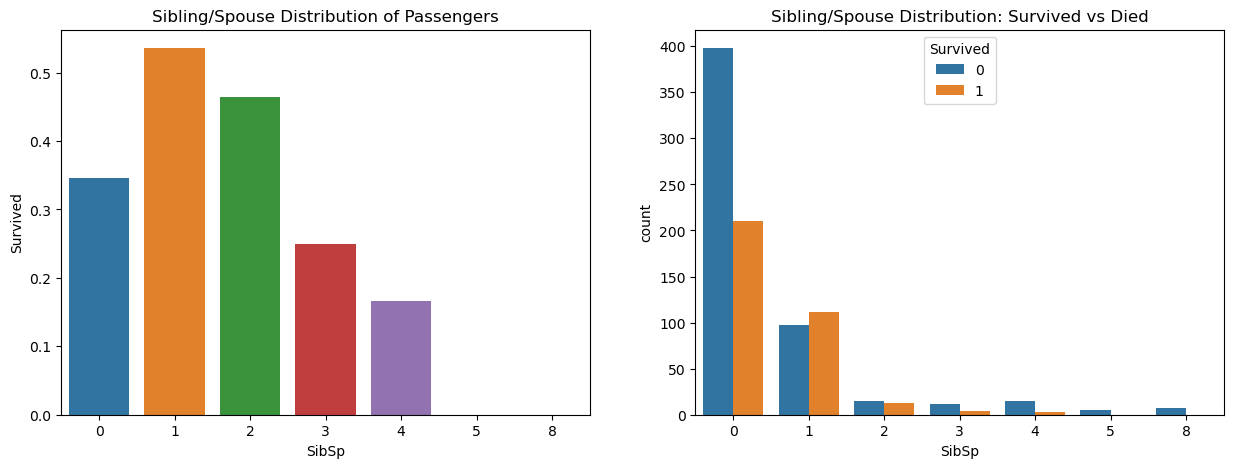

In [10]:
f, axes = plt.subplots(ncols=2, figsize=(15,5))

sb.barplot(x="SibSp", y="Survived", ci=None, ax=axes[0], data=df)
axes[0].set_title("Sibling/Spouse Distribution of Passengers")

sb.countplot(x="SibSp", hue = "Survived", ax=axes[1], data=df)
axes[1].set_title("Sibling/Spouse Distribution: Survived vs Died")

plt.show()

In [11]:
df["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

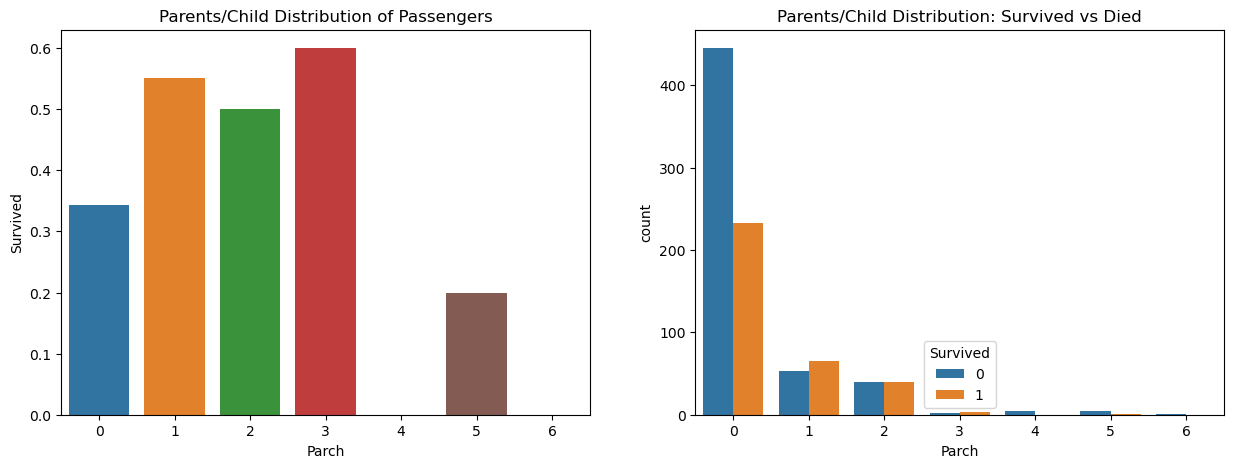

In [12]:
f, axes = plt.subplots(ncols=2, figsize=(15,5))

sb.barplot(x="Parch", y="Survived", ci=None, ax=axes[0], data=df)
axes[0].set_title("Parents/Child Distribution of Passengers")

sb.countplot(x="Parch", hue = "Survived", ax=axes[1], data=df)
axes[1].set_title("Parents/Child Distribution: Survived vs Died")

plt.show()

In [13]:
df['Family_size'] = df['SibSp'] + df['Parch'] + 1

In [14]:
df['Family_size'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family_size, dtype: int64

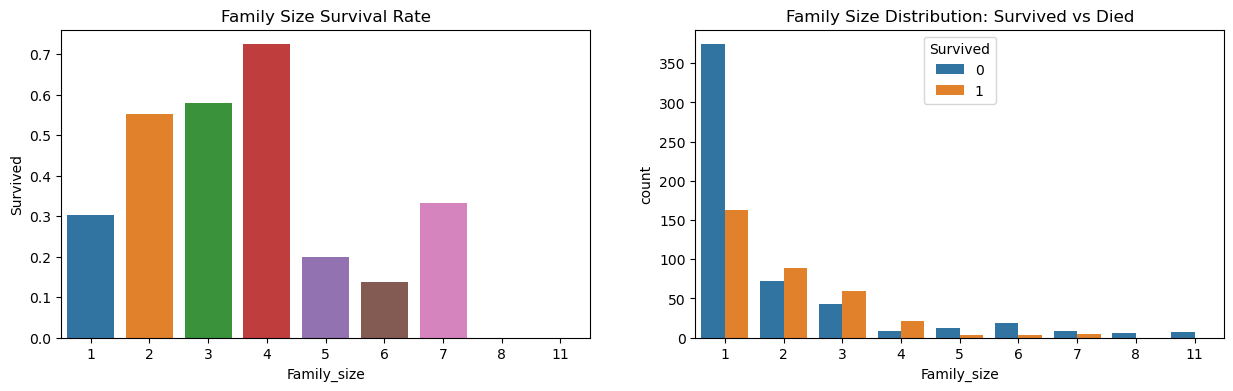

In [15]:
f, ax = plt.subplots(ncols=2, figsize=(15,4))

sb.barplot(x="Family_size", y="Survived", ci=None, ax=ax[0], data=df)
ax[0].set_title("Family Size Survival Rate")

sb.countplot(x="Family_size", hue="Survived", ax=ax[1], data=df)
ax[1].set_title("Family Size Distribution: Survived vs Died")

plt.show()

In [16]:
df["Family_type"] = pd.cut(df.Family_size, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very Big'])

In [17]:
df.Family_type.value_counts()

Solo        537
Small       292
Big          49
Very Big     13
Name: Family_type, dtype: int64

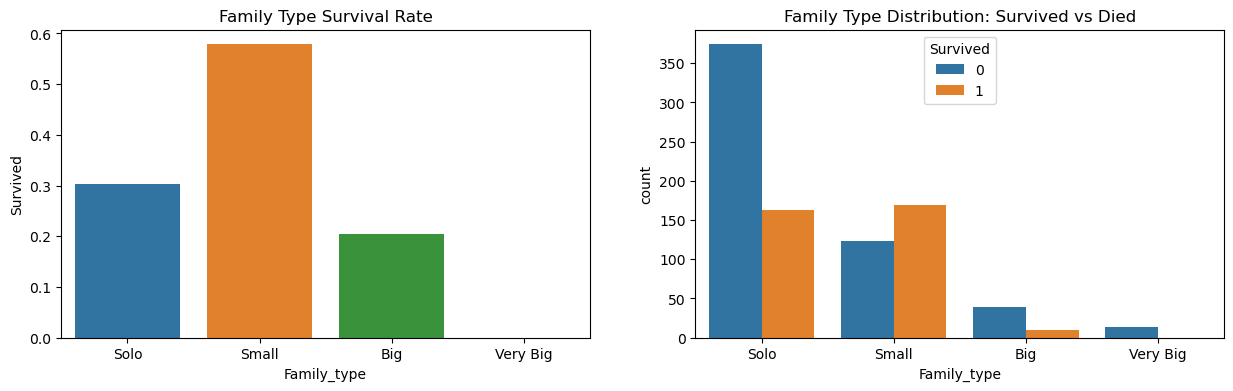

In [18]:
f, ax = plt.subplots(ncols=2, figsize=(15,4))

sb.barplot(x="Family_type", y="Survived", ci=None, ax=ax[0], data=df)
ax[0].set_title("Family Type Survival Rate")

sb.countplot(x="Family_type", hue="Survived", ax=ax[1], data=df)
ax[1].set_title("Family Type Distribution: Survived vs Died")

plt.show()

In [19]:
features = ["Pclass", "Fare", "Sex", "Embarked", "Family_type"]
X = df[features]
Y = df["Survived"]

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


numerical_cols = ['Fare']
categorical_cols = ['Pclass', 'Sex', 'Embarked', 'Family_type']

numerical_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

titanic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=0, n_estimators=500, max_depth=5,))
])

titanic_pipeline.fit(X,Y)

print('Cross validation score: {:.3f}'.format(cross_val_score(titanic_pipeline, X, Y, cv=10).mean()))

Cross validation score: 0.807


In [21]:
df_test = pd.read_csv(r"C:\Users\Dell\Downloads\titanic\test.csv")
df_test['Family_size'] = df_test['SibSp'] + df_test['Parch'] + 1
df_test["Family_type"] = pd.cut(df_test.Family_size, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very Big'])

In [22]:
test_values = df_test[["Pclass", "Fare", "Sex", "Embarked", "Family_type"]]
test_values.head()

Pclass     Fare     Sex Embarked Family_type
0       3   7.8292    male        Q        Solo
1       3   7.0000  female        S       Small
2       2   9.6875    male        Q        Solo
3       3   8.6625    male        S        Solo
4       3  12.2875  female        S       Small

In [23]:
test_values["Fare"].isnull().value_counts()

False    417
True       1
Name: Fare, dtype: int64

In [24]:
predictions = titanic_pipeline.predict(test_values)
df_submission = pd.DataFrame({'PassengerId':df_test['PassengerId'], 'Survived':predictions})

In [25]:
df_submission["Survived"].value_counts()

0    289
1    129
Name: Survived, dtype: int64

In [27]:
df_submission.to_csv("predictions.csv", index=False)

In [28]:
pred = pd.read_csv(r"predictions.csv")
pred

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]